In [2]:
import pandas as pd
import geopandas as gp
import fiona
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pylab as pylab
from scipy import ndimage
import numpy as np
import seaborn
import scipy
import adjustText as aT
import six

In [3]:
map = gp.read_file('Rate of COVID-19 Cases by Census ZIP Code Tabulation Area')

In [4]:
map.head()

,acs_popula,city_acs_p,city_count,city_rate,count,date_data_,time_data_,objectid,rate,rate_diff,rate_group,zip_code,geometry
0,43638.0,864263.0,2320.0,26.843681,39.0,2020-06-03,00:00:00.000,2,8.937165,-17.906516,5-10,94121,"MULTIPOLYGON (((-122.48543 37.78982, -122.4850..."
1,6547.0,864263.0,2320.0,26.843681,25.0,2020-06-03,00:00:00.000,13,38.185428,11.341748,35-40,94158,"MULTIPOLYGON (((-122.38370 37.75470, -122.3840..."
2,29920.0,864263.0,2320.0,26.843681,122.0,2020-06-03,00:00:00.000,18,40.775401,13.931720,40-45,94107,"MULTIPOLYGON (((-122.38530 37.78984, -122.3851..."
3,35492.0,864263.0,2320.0,26.843681,194.0,2020-06-03,00:00:00.000,5,54.660205,27.816524,>50,94124,"POLYGON ((-122.39360 37.70827, -122.39343 37.7..."
4,26990.0,864263.0,2320.0,26.843681,158.0,2020-06-03,00:00:00.000,15,58.540200,31.696519,>50,94103,"POLYGON ((-122.39781 37.78467, -122.39833 37.7..."


In [5]:
map.head()
map = map.to_crs(epsg=3857)

In [6]:
map["rep"] = map["geometry"].representative_point()
map_points = map.copy()
map_points.set_geometry("rep", inplace = True)


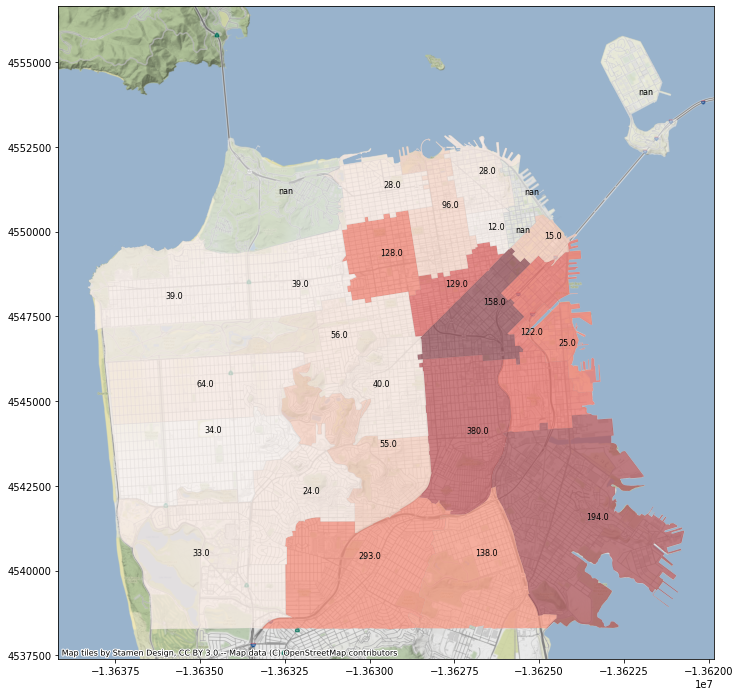

In [7]:
ax = map.plot( figsize = (12, 12), facecolor = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5,alpha=0.5)
texts = []

for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["count"]):
    texts.append(plt.text(x, y, label, fontsize = 8))
ax.set_aspect('equal')

    
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
map.plot(column='rate',cmap='Reds',ax=ax,alpha=0.5)

ctx.add_basemap(ax,zoom = 15)

plt.savefig('sfMap.png')

In [8]:
df = pd.read_csv('COVID-19_Cases_Summarized_by_Race_and_Ethnicity.csv')
df = df.dropna()

In [9]:
df

,Confirmed Cases,Race/Ethnicity
0,32,Native Hawaiian or Other Pacific Islander
1,11,Native American
2,23,Other
3,131,Black or African American
4,33,Multi-racial
5,334,Asian
6,420,Unknown
7,1264,"Hispanic or Latino/a, all races"
8,396,White


In [10]:
race2 = df.pivot_table(values=['Confirmed Cases'],index='Race/Ethnicity',)

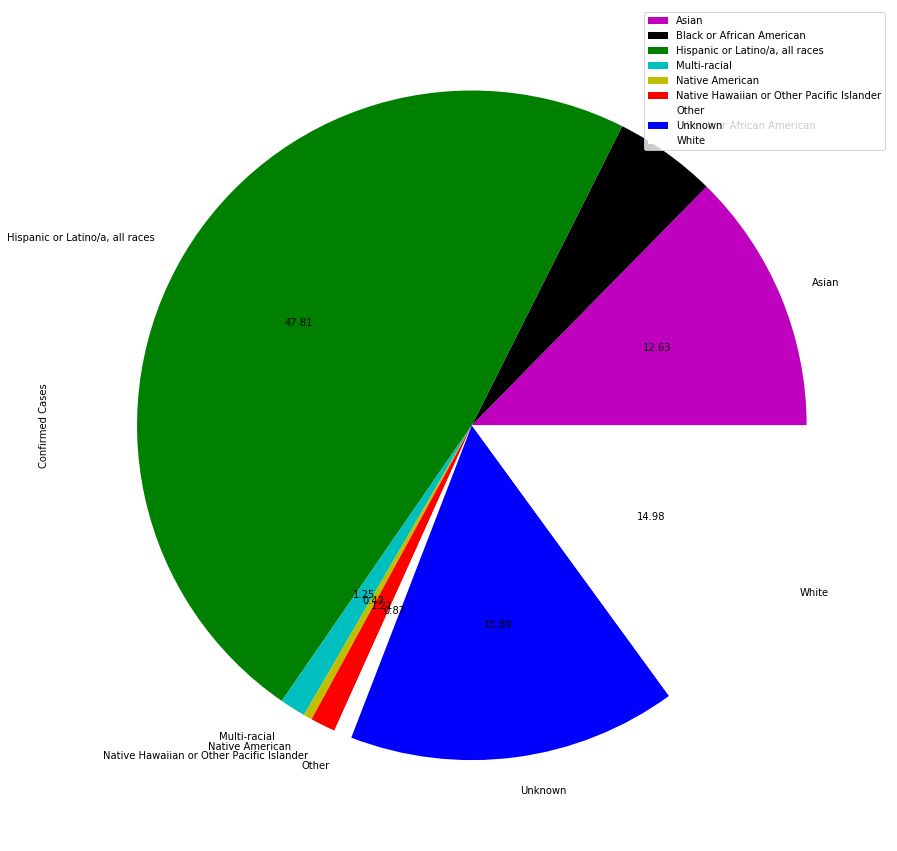

In [11]:
race2.plot.pie(subplots=True,figsize=(15,20),autopct='%.2f',colors='mkgcyrwbw')
plt.savefig('racepie.png')
plt.savefig('sfpie.png')

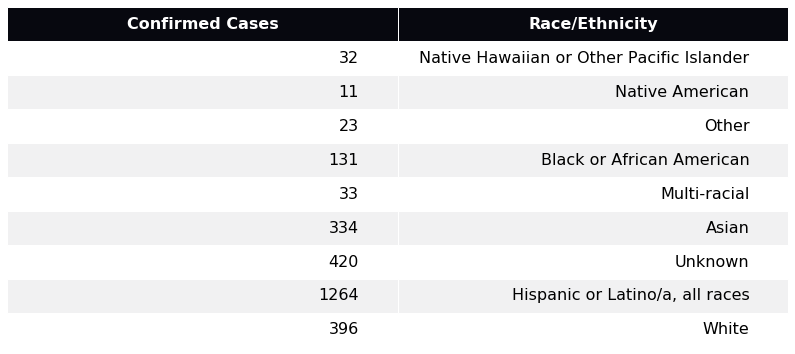

In [12]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#07080f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=7)
plt.savefig('sftable.png')